# Problem 1. Birthday Paradox

Problem description:
How many people do we need to consider so that it’s more than 50% likely that at least 2 of them share a birthday?


## Exact calculation

Exact solution from pen & paper:
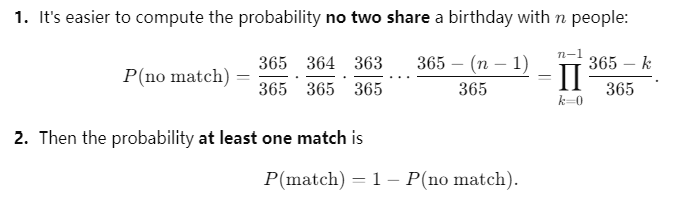

In [10]:
def p_match(n, days=365):
    """Exact probability that no two of n people share a birthday."""
    P = 1.0
    for i in range(1, n + 1):
        P = P *(days-(i - 1))/days
    return 1 - P

In [8]:
# 4 days 
1 - 1*364/365*363/365*362/365

0.016355912466550326

In [11]:
p_match(4)

0.016355912466550326

### where is 50%?

In [4]:
for n in range(1, 101):
    if p_match(n) > 0.5:
        print(n)
        break

23


## Draw a plot!

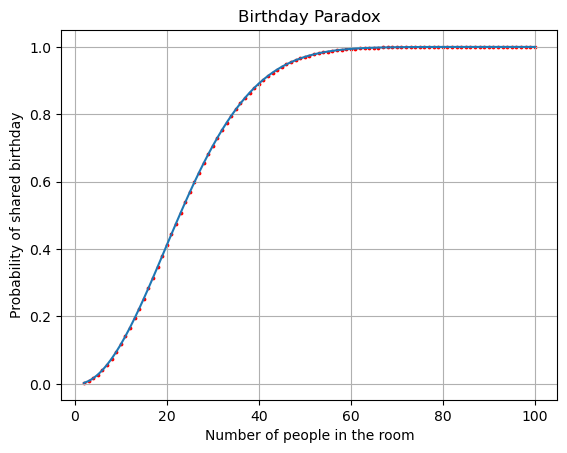

In [ ]:
xs = list(range(2, 101))
ys = [p_match(n) for n in xs]
import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.scatter(xs, ys, label="Points", color='red', s=3)  

plt.xlabel("Number of people in the room")
plt.ylabel("Probability of shared birthday")
plt.title("Birthday Paradox")
plt.grid(True)
plt.show()

## Monte Carlo Simulation

“Monte Carlo is a way to estimate probabilities by simulating random events many times and counting how often something happens.”

For the birthday paradox, the computer:

1. creates a random group of n people

2. assigns each a random birthday

3. checks if any two match

4. repeats thousands of times

5. counts how often matches happen

In [ ]:
import random
import math

def monte_carlo_birthday(n, trials=10, days=365, seed=None):
    """Estimate the probability thatat least two people share a birthday."""

    count_shared_birthdays = 0

    for _ in range(trials):
        birthdays = []
        for _ in range(n):
            birthday = random.randrange(days)
            birthdays.append(birthday)
        
        unique_birthdays = set(birthdays)

        group_size = len(birthdays)
        unique_size = len(unique_birthdays)

        has_match = unique_size < group_size

        if has_match:
            count_shared_birthdays += 1

    probability = count_shared_birthdays / trials

    return probability

In [ ]:
for n in [10, 20, 23, 30, 40, 50]:
    test = monte_carlo_birthday(n,trials=10, seed=1)
    print(f"n={n:2d}  Monte Carlo = {test:.6f}")

n=10  Monte Carlo = 0.000000
n=20  Monte Carlo = 0.500000
n=23  Monte Carlo = 0.300000
n=30  Monte Carlo = 0.800000
n=40  Monte Carlo = 0.800000
n=50  Monte Carlo = 1.000000


In [ ]:
for n in [10, 20, 23, 30, 40, 50]:
    test = monte_carlo_birthday(n, trials=10000, seed=1)
    print(f"n={n:2d}  Monte Carlo = {test:.6f}")


n=10  Monte Carlo = 0.113700
n=20  Monte Carlo = 0.407600
n=23  Monte Carlo = 0.501800
n=30  Monte Carlo = 0.697000
n=40  Monte Carlo = 0.888800
n=50  Monte Carlo = 0.972000


## All together!

In [9]:
# birthday_paradox.py
import random
import math

def p_no_match(n, days=365):
    """Exact probability that no two of n people share a birthday."""
    p = 1.0
    for k in range(n):
        p *= (days - k) / days
    return p

def p_match(n, days=365):
    return 1 - p_no_match(n, days)

def monty_carlo_birthday(n, trials=10000, days=365, seed=None):
    count_shared_birthdays = 0

    for _ in range(trials):
        birthdays = []
        for _ in range(n):
            birthday = random.randrange(days)
            birthdays.append(birthday)

        unique_birthdays = set(birthdays)

        group_size = len(birthdays)
        unique_size = len(unique_birthdays)

        has_match = unique_size < group_size

        if has_match:
            count_shared_birthdays += 1

    probability = count_shared_birthdays / trials

    return probability

if __name__ == "__main__":
    for n in [20, 22, 23, 24, 30]:
        print(f"n={n:2d}  P(match) exact = {p_match(n):.6f}")

    # Monte Carlo quick check
    trials = 50000
    for n in [22, 23, 24]:
        est = monty_carlo_birthday(n, trials=trials, seed=1)
        print(f"n={n:2d}  Monte Carlo (trials={trials}) = {est:.6f}")


n=20  P(match) exact = 0.411438
n=22  P(match) exact = 0.475695
n=23  P(match) exact = 0.507297
n=24  P(match) exact = 0.538344
n=30  P(match) exact = 0.706316
n=22  Monte Carlo (trials=50000) = 0.477120
n=23  Monte Carlo (trials=50000) = 0.510440
n=24  Monte Carlo (trials=50000) = 0.534800


# Problem 2. The “Shared Initials” Paradox

Problem description:

In a room of n people, what’s the probability that at least two people share the same initials (e.g., J.S., M.T.)? 

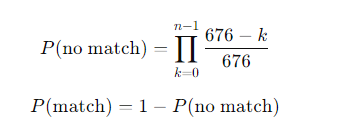

In [16]:
def p_initials_match(n, initials=676):
    """Exact probability that no two of n people share a initials."""
    P = 1.0
    for n in range(1, n + 1):
        P = P *(initials-(n - 1))/initials
    return 1 - P

In [17]:
for n in [10, 20, 30, 40]:
    print(f"n={n:2d}  P(match) exact = {p_initials_match(n):.6f}")

n=10  P(match) exact = 0.064695
n=20  P(match) exact = 0.247088
n=30  P(match) exact = 0.479550
n=40  P(match) exact = 0.691798


In [18]:
import random

def shared_initials_sim(n, trials=20000):
    count = 0
    for _ in range(trials):
        initials = []
        for _ in range(n):
            initial = random.randrange(676)
            initials.append(initial)
        if len(initials) != len(set(initials)):
            count += 1
    return count / trials

for n in [10, 20, 30, 40]:
    print(n, shared_initials_sim(n))

10 0.06165
20 0.24595
30 0.4787
40 0.6921
